In [1]:
import pandas as pd
import orodja
import numpy as np
%matplotlib inline

In [2]:
izleti = pd.read_csv("izleti.csv", encoding='utf-8')

# Izleti na slovenske dvatisočake
Kot zaveden Slovenec se zavedam edinstvenosti slovenskega pogorja, danosti, ki je nima vsak narod. Doma sem s praga Alp, ki gostijo vse dvatisočake na našem ozemlju, in sem navdušen pohodnik, zato rad uporabljam spletni portal hribi.net, kjer so uporabni opisi dostopov na vse slovenske in okoliške bisere. Ker Šmarna gora ni gora, sem se pri razčlenjevanju podatkov omejil na izlete, ki nas ponesejo nad dvokilometrsko mejo nad morjem.

Na začetku sem pomislil, kakšne informacije bi me kot pohodnika zanimale. Zagotovo najprej pogledamo cilj in izhodišče, nadmorsko višino, višino izhodišča in izračunamo višinsko razliko (pri mnogih izletih to ni edina višinska razlika, ki jo je treba premagati, zato nam hribi.net ponudijo tudi višinsko razliko po poti, ki vključuje vmesne vzpone in spuste). Poleg osnovnih podatkov pa me je zanimalo, kako določeno pot (ne samo cilj, ta ni prvotnega pomena) vidimo planinci, zato sem s spleta prenesel še podatke o številu ogledov posameznega izleta in oceni (da bi zagotovil primerno zadržanost do podatkov sem moral dodati tudi število ocen). Temu sem dodal še vrsto cilja, časovno vrednost dolžine poti in zemljepisne koordinate cilja.

Moj namen je analizirati zahtevnosti poti (glede na nadmorsko višino), poiskati najbolj prepredena alpska območja, njihovo zanimivost za planince (glede na višinsko razliko, čas hoje, lokacijo, vrsto cilja ...) in druge zanimive podatke.

In [3]:
izleti.head(10)

,gorovje,izhodišče,višina_izhodišča,cilj,višina_cilja,opomba_poti,čas_hoje,zahtevnost,višinska_razlika_po_poti,število_ogledov,ocena,število_glasov,širina_cilja,dolžina_cilja,vrsta_cilja
0,Julijske Alpe,Stara Fužina,600,Triglav,2864,čez Planiko in Triglavsko škrbino,450,zelo zahtevna označena pot,2264,19345,7,1,"46,37832","13,83648","vrh, bivak"
1,Julijske Alpe,Rudno polje,1347,Triglav,2864,čez Kredarico,380,zelo zahtevna označena pot,1900,74961,9,4,"46,37832","13,83648","vrh, bivak"
2,Julijske Alpe,Aljažev dom v Vratih,1015,Triglav,2864,Tominškova pot,350,zelo zahtevna označena pot,1849,219792,8,13,"46,37832","13,83648","vrh, bivak"
3,Julijske Alpe,Aljažev dom v Vratih,1015,Triglav,2864,čez Prag,360,zelo zahtevna označena pot,1850,123470,9,12,"46,37832","13,83648","vrh, bivak"
4,Julijske Alpe,Aljažev dom v Vratih,1015,Triglav,2864,čez Plemenice,390,zelo zahtevna označena pot,1849,118601,9,13,"46,37832","13,83648","vrh, bivak"
5,Julijske Alpe,Dolina Kot,950,Triglav,2864,NaN,360,zelo zahtevna označena pot,2050,41559,8,8,"46,37832","13,83648","vrh, bivak"
6,Julijske Alpe,Dolina Krma,930,Triglav,2864,čez Kredarico,360,zelo zahtevna označena pot,1934,112269,8,5,"46,37832","13,83648","vrh, bivak"
7,Julijske Alpe,Dolina Krma,930,Triglav,2864,čez Planiko in Mali Triglav,360,zelo zahtevna označena pot,1934,114066,9,7,"46,37832","13,83648","vrh, bivak"
8,Julijske Alpe,Dolina Krma,930,Triglav,2864,čez Planiko in Triglavsko škrbino,345,zelo zahtevna označena pot,1934,34269,8,4,"46,37832","13,83648","vrh, bivak"
9,Julijske Alpe,Konec ceste na Pokljuki,1340,Triglav,2864,čez Kredarico,360,zelo zahtevna označena pot,1650,50305,9,7,"46,37832","13,83648","vrh, bivak"


## Nekaj osnovnih podatkov o pristopih na gore

### Število izletov v posameznem gorovju

In [4]:
izleti.groupby('gorovje').size()

gorovje
Julijske Alpe              551
Kamniško Savinjske Alpe    236
Karavanke                  147
dtype: int64

### Cilji z največ možnimi potmi

In [5]:
st_poti_na_cilj = izleti.groupby('cilj').size()
st_poti_na_cilj.sort_values(ascending=False).head(15)

cilj
Storžič                     30
Triglav                     26
Viševnik                    21
Stol                        20
Ojstrica                    17
Prešernova koča na Stolu    14
Begunjščica                 14
Kordeževa glava (Peca)      14
Grintovec                   14
Jezerska Kočna              14
Debela peč                  13
Kalški greben               13
Planjava                    12
Krn                         12
Prisank / Prisojnik         12
dtype: int64

Spodaj je zemljevid vseh vrhov, ki segajo nad 2000 m. Z rdečo piko sta označeni Ljubljana in Radovljica.

Text(0,0.5,'Geografska širina')

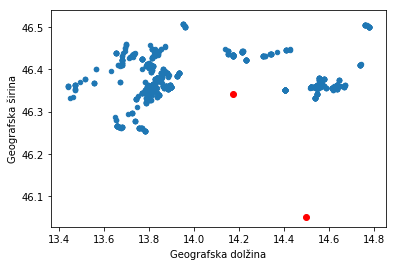

In [6]:
izleti['dolžina_cilja_num'] = izleti['dolžina_cilja'].apply(orodja.str_to_float)
izleti['širina_cilja_num'] = izleti['širina_cilja'].apply(orodja.str_to_float)
zemljevid = izleti.plot.scatter('dolžina_cilja_num', 'širina_cilja_num')
zemljevid.plot(14.172078, 46.342517, 'or')
zemljevid.plot(14.5, 46.05, 'or')
zemljevid.set_xlabel('Geografska dolžina')
zemljevid.set_ylabel('Geografska širina')

## Višinska razlika

In [7]:
izleti["višinska_razlika"] = izleti["višina_cilja"] - izleti['višina_izhodišča']

In [8]:
izleti.sort_values(
    'višinska_razlika', ascending=False
).head(15)[
    ['izhodišče','višina_izhodišča', 'cilj', 'višina_cilja', 'opomba_poti', 'višinska_razlika']
]

,izhodišče,višina_izhodišča,cilj,višina_cilja,opomba_poti,višinska_razlika
22,Srednja vas,583,Triglav,2864,Za Ribnico in čez Triglavsko škrbino,2281
12,Stara Fužina,600,Triglav,2864,čez Planiko in Mali Triglav,2264
0,Stara Fužina,600,Triglav,2864,čez Planiko in Triglavsko škrbino,2264
13,Zadnjica,650,Triglav,2864,čez Plemenice,2214
16,Zadnjica,650,Triglav,2864,čez Komar,2214
14,Zadnjica,650,Triglav,2864,čez Dolič,2214
18,Koča pri Savici,653,Triglav,2864,čez Triglavska jezera,2211
197,Zadnjica,650,Škrlatica,2740,NaN,2090
198,Gozd Martuljek,750,Škrlatica,2740,grebensko prečenje Mali Oltar-Škrlatica,1990
533,Zadnjica,650,Razor,2601,NaN,1951


### Povprečna višinska razlika pri pristopu na posamezno goro

In [9]:
izleti.groupby('cilj').mean()['višinska_razlika'].sort_values(ascending=False).round(decimals=1).head(10)

cilj
Škrlatica                1886.2
Triglav                  1877.8
Mišeljski Konec          1814.0
Mala Martuljška Ponca    1751.0
Široka peč               1747.0
Mali Triglav             1731.7
Visoki Rokav             1705.0
Morbegna                 1704.3
Mišelj vrh               1700.0
Glava v Zaplanji         1690.5
Name: višinska_razlika, dtype: float64

In [10]:
izleti.groupby('cilj').mean()['višinska_razlika'].sort_values(ascending=False).round(decimals=1).tail(10)

cilj
Dom Petra Skalarja na Kaninu    621.5
Velika Zelenica                 614.0
Veliki vrh (Veža)               610.0
Pungartska gora                 595.0
Mala Raduha                     529.0
Molička peč                     529.0
Mala Ojstrica                   517.0
Suhi vrh                        498.0
Šitna glava                     476.0
Mali Kanin                      369.0
Name: višinska_razlika, dtype: float64

## Višinska razlika po poti

### Povprečna višinska razlika po poti pri izletu na posamezno goro

In [11]:
izleti.groupby('cilj').mean()['višinska_razlika_po_poti'].sort_values(ascending=False).round(decimals=1).head(15)

cilj
Škrlatica                  2572.5
Triglav                    2057.8
Morbegna                   1833.3
Mišelj vrh                 1825.0
Mišeljski Konec            1815.0
Mala Martuljška Ponca      1800.0
Velika Martuljška Ponca    1800.0
Kanjavec                   1781.9
Glava v Zaplanji           1775.2
Mali Triglav               1773.3
Široka peč                 1750.0
Veliki Oltar               1750.0
Razor                      1735.6
Kanjavec (Zahodni vrh)     1727.5
Skuta                      1724.7
Name: višinska_razlika_po_poti, dtype: float64

In [12]:
izleti.groupby('cilj').mean()['višinska_razlika_po_poti'].sort_values(ascending=False).round(decimals=1).tail(15)

cilj
Velika Mojstrovka               800.0
Zadnja Mojstrovka               800.0
Toplar                          786.0
Veliki vrh (Veža)               737.5
Velika Zelenica                 726.2
Brda                            716.4
Mala Ojstrica                   700.0
Konjc                           685.0
Dom Petra Skalarja na Kaninu    685.0
Molička peč                     608.3
Mali Kanin                      600.0
Suhi vrh                        600.0
Pungartska gora                 595.0
Mala Raduha                     529.0
Šitna glava                     476.0
Name: višinska_razlika_po_poti, dtype: float64

## Zahtevnosti poti

### Zahtevnost poti po gorovjih

Ogledali si bomo, kakšnih poti je po posameznem gorovju največ in kakšna je "povprečna zahtevnost" poti po gorovjih. Naj omenim, da ena pot sovpada z enim izletom.

In [13]:
izleti['zahtevnost_št'] = izleti['zahtevnost'].apply(orodja.pretvori_zahtevnost)

#### Julijske Alpe

Zanima nas, kakšnih poti je po Slovenskih Julijcih največ

In [14]:
julijci = izleti[izleti['gorovje']=='Julijske Alpe']
julijci['zahtevnost'].value_counts().argmax()

'zelo zahtevna označena pot'

Delež zelo zahtevnih označenih poti v Julijskih Alpah pa preberemo:

In [15]:
"{:.1%}".format(julijci.groupby('zahtevnost').size().max() / len(julijci.index))

'19.4%'

Izračunajmo "povprečno zahtevnost" poti po Julijcih:

In [16]:
orodja.pretvori_stevilo(round(julijci['zahtevnost_št'].mean()))

'zahtevna pot'

#### Karavanke

V Karavankah je najpogostejša pot:

In [17]:
karav = izleti[izleti['gorovje']=='Karavanke']
karav['zahtevnost'].value_counts().argmax()

'lahka označena pot'

Takih poti je

In [18]:
"{:.1%}".format(karav.groupby('zahtevnost').size().max() / len(karav.index))

'25.9%'

Povprečna zahtevnost je

In [19]:
orodja.pretvori_stevilo(round(karav['zahtevnost_št'].mean()))

'delno zahtevna pot'

#### Kamniško Savinjske Alpe

Najpogostejša pot:

In [20]:
ksa = izleti[izleti['gorovje']=='Kamniško Savinjske Alpe']
ksa['zahtevnost'].value_counts().argmax()

'zelo zahtevna označena pot'

Takih poti je

In [21]:
"{:.1%}".format(ksa.groupby('zahtevnost').size().max() / len(ksa.index))

'30.9%'

Povprečna zahtevnost:

In [22]:
orodja.pretvori_stevilo(round(ksa['zahtevnost_št'].mean()))

'zahtevna pot'

### Zahtevnost pristopov na goro

Če si torej izberemo goro za sobotni izlet, a smo v planinstvu popolni začetniki, kolikšna je verjetnost, da na naš izbrani cilj vodi lahka pot? No, na to vprašanje ne odgovorimo povsem eksaktno, nam pa spodnji graf pove bistvo: koliko je ciljev, na katere je neka vrsta poti najenostavnejši pristop.

Text(0,0.5,'Število gora')

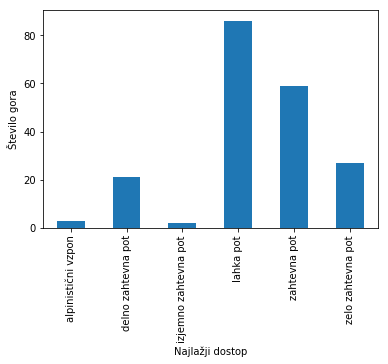

In [23]:
graf_najlazjega_dostopa = izleti.groupby('cilj').min()[
    'zahtevnost_št'
].sort_values().apply(
    orodja.pretvori_stevilo
).to_frame().groupby('zahtevnost_št').size().plot.bar()
graf_najlazjega_dostopa.set_xlabel('Najlažji dostop')
graf_najlazjega_dostopa.set_ylabel('Število gora')

Vidimo, da na večino gora lahko prispemo po lahki poti, lahko pa imamo smolo in si za cilj izberemo kakšnega od redkih vrhov, na katerega vodi le alpinistični vzpon.

## Označenost poti

In [ ]:
izleti['označenost_št'] = izleti['zahtevnost'].apply(orodja.oznacenost)
izleti['označenost'] = izleti['zahtevnost'].apply(orodja.oznacenost).apply(orodja.pretvori_oznacenost)

#### Pristopi na gore glede na najboljšo označenost

Na podoben način kot zahtevnost poti bomo analizirali označenost. Spodnji graf prikazuje, koliko je ciljev, na katere vodijo označene in neoznačene poti, ter na koliko ciljev "vodi" samo brezpotje.

In [ ]:
graf2 = izleti.groupby('cilj').min()[
    'označenost_št'
].apply(
    orodja.pretvori_oznacenost
).to_frame().groupby('označenost_št').size().plot.bar()
graf2.set_xlabel('Najboljša označenost')
graf2.set_ylabel('Število gora')

Vidimo, da je večina slovenskih dvatisočakov opremljena z vsaj eno označeno potjo.

In [ ]:
st_oznacenosti_glede_na_cilj = pd.crosstab(
    izleti.označenost,
    izleti.cilj
)

tabela1 = st_oznacenosti_glede_na_cilj / st_poti_na_cilj
tabela2 = tabela1.transpose()

oznacenost_cilja = tabela2['označena pot']
izleti = izleti.join(oznacenost_cilja, on='cilj')

In [ ]:
st_oznacenosti_glede_na_cilj.transpose()

Za vsak cilj ugotovimo še, ali nanj vodi kakšna označena pot. To bomo uporabili kasneje.

In [ ]:
def oznaci(stev):
    if stev > 0:
        return True
    else:
        return False

cilji = izleti.groupby('cilj')['višina_cilja'].mean().to_frame()
cilj_je_dostopen = oznacenost_cilja.apply(oznaci).to_frame()
dostopnost_cilja = cilji.join(cilj_je_dostopen)

## Analiza podatkov glede na različne vrste višin

In [ ]:
izleti['hitrost'] = izleti.višinska_razlika / izleti.čas_hoje

Ker ne analiziram gora, marveč poti nanje, se bom osredinil na razrede, ki nastanejo po delitvi izletov glede na njihovo višinsko razliko in, kadar bo situacija tako nanesla, uporabil tudi delitev glede na nadmorsko višino cilja.

Najprej si oglejmo, koliko je sploh izletov v posameznem razredu. Pričakujemo, da bo malo izletov z zelo majhno višinsko razliko, saj je malo izhodišč z nadmorsko višino okrog 2000 m. Prav tako najbrž ne bo veliko izletov z višinsko razliko nad 2000 m, saj bi to pomenilo, da se moramo vzpeti na dvatisočak od zelo daleč (blizu tako visoke gore so tudi izhodišča visoka).

In [ ]:
izleti['višinski_razred'] = (izleti['višinska_razlika'] // 100) * 100

In [ ]:
razredi = izleti.groupby('višinski_razred')
razredi.size().plot.bar()

Vidimo, da je največ izletov z višinsko razliko okrog 1500 m in je res malo skrajnih vrednosti.


Zdaj nas zanima, kako hitro prelezemo neko višinsko razliko. Pričakujemo, da bomo večje višinske razlike premagovali hitreje, saj bo pot strmejša in bomo hitreje dobivali višino. Spodnji graf prikazuje, koliko višinskih metrov naredimo na minuto.

In [ ]:
razredi.mean()['hitrost'].plot.bar(y='višinski_metri_na_minuto')

Očitno je, da pri majhnih višinskih razlikah višino pridobivamo počasi, saj se gibljemo bolj vodoravno. Opazimo tudi, da so poleg teh odstopanj hitrosti precej podobne, kar lahko kaže na to, da je čas hoje na hribi.net preračunan glede na višinsko razliko.

Zdaj nas zanima, kako dobro so označene poti v posameznem razredu nadmorske višine cilja. Cilji so razdeljeni v razrede nadmorskih višin, prvi graf pa prikazuje, na kolikšen delež ciljev v posameznem razredu vodi označena pot. Drugi graf enostavno prikaže število označenih poti na cilje v višinskem razredu cilja.

In [ ]:
izleti['razred_cilja'] = (izleti.višina_cilja // 100) * 100

In [ ]:
dostopnost_cilja['razred_cilja'] = (dostopnost_cilja.višina_cilja // 100) * 100
dostopnost = dostopnost_cilja[
    dostopnost_cilja['označena pot']==True
].groupby('razred_cilja').size() / dostopnost_cilja.groupby('razred_cilja').size()
dostopnost.plot.bar()

In [ ]:
dostopnost_cilja[
    dostopnost_cilja['označena pot']==True
].groupby('razred_cilja').size().plot.bar()

Očitno se na vse cilje v razredu 2700 in 2800 (to so le Mali Triglav, Škrlatica in Triglav) lahko povzpnemo po označeni poti.


Spodnji graf prikazuje še povprečno označenost poti v istih razredih.

In [ ]:
izleti.groupby('razred_cilja').mean()['označena pot'].plot.bar()

Pri nižji nadmorski višini je torej manjši odstotek poti označen. Podatek je precej povezan z ugotovitvami naslednjega razdelka.

### Zanimanje za posamezen višinski razred

Zdaj nas zanima, koliko je ogledov izletov določenega višinskega razreda. Radi bi videli, o kakšnih izletih se ljudje največkrat pozanimajo. Sklepam, da je največ ogledov tam, kjer je največ izletov, torej okrog višinske razlike 1500, zato bomo izračunali povprečno število ogledov na izlet glede na višinski razred.

In [ ]:
zanimivi = izleti[izleti.število_ogledov > 4000]
zanimivi_razredi = zanimivi.groupby('višinski_razred')
(zanimivi_razredi.sum()['število_ogledov'] / zanimivi_razredi.size()).plot.bar()

Pričakovano je največ zanimanja za izlete z najvišjo višinsko razliko, saj je v tem razredu Triglav, naša najbolj mikavna gora.

Morda bomo lepši vzorec dobili, če izračunamo število ogledov posameznega višinskega razreda cilja.

In [ ]:
(zanimivi.groupby('razred_cilja').mean()['število_ogledov']).plot.bar()

Tu lepo vidimo, da je največ zanimanja za najvišje izlete, zopet je to pričakovano zaradi Triglava.

Poglejmo si še, kako sta odvisna ocena izleta in višinski razred.

In [ ]:
uporabni = izleti[izleti.število_glasov > 4]
uporabni.groupby('višinski_razred').mean()['ocena'].plot.bar()

Ne ravno zanimiv, pa vendar zgovoren zaključek je, da ocena ni odvisna od višinskega razreda.

## Zaključek

Kljub temu da je portal hribi.net precej manj obiskan kot drugi možni viri podatkov, se iz njega da razbrati marsikaj zanimivega. Ena bolj zanimivih ugotovitev je, da hitrost vzpenjanja ni odvisna od višinske razlike. Prebral sem podatek, da pri planinarjenjum moramo računati, da nam 300 m višinske razlike vzame eno uro, kar precej sovpada s časom, ki ga ponudi portal hribi.net. Torej upravičeno sklepamo, da je ta izračun vir informacije o času hoje.

Druga precej zanimiva tema je označenost poti. Ta je najboljša v najvišjih predelih, kar je precej smiselno, saj je v tem višinskem razredu manj poti, ki pa so skoraj vse označene, saj je neoznačenost na 2800 metrih mnogo manj ustrezna kot označenost na 2000 metrih. Prav tako so poti na naše najvišje vrhove že dodobra razdelane (in zdelane).

Tretja zanimiva ugotovitev pa je, da so podatki s strani hribi.net na pogled precej naključni. Ocene poti so na primer povsem nelogično razporejene, prav tako časi in zahtevnosti. Najboljša ugotovitev, ki jo lahko izvlečem iz tega, je, da so izleti na naše gore vsak na svoj način posebni in eden ni enak drugemu.